# About notebook
I just try to realize expected EC by Bobrowski and Skraba formulas

In [1]:
import time
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_mean_betty(df: pd.DataFrame, array, dim=None):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    dim : int or None
        Dimension of topological space
        If that's None< that will be maximal dimension from dfs['Dimension']
    
    Returns:
    --------
    res : np.array shape (len(array), dim)
        Array of 
    """
    if dim is None:
        dim = df['Dimension'].max()
    res = np.zeros([len(array), dim])
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()[['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby('Dimension', as_index=False).mean()
        index = dfi['Dimension'].values
        vals = dfi['Birth'].values
        res[i, index] = vals
    return res

In [3]:
def calculate_mean_EC(df: pd.DataFrame, array):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    
    Returns:
    --------
    res : np.array length len(array)
        Array of 
    """
    res = np.zeros(len(array))
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)][['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()
        dfi.columns = ['Space', 'Dimension', 'Count']
        dfi['Summand EC'] = (-1)**dfi['Dimension'] * dfi['Count']
        dfi = dfi.groupby('Space', as_index=False).sum()['Summand EC']
        res[i] = dfi.mean()
    res[np.isnan(res)] = 0
    return res

In [4]:
def calculate_mean_EC_value(df: pd.DataFrame, time, dim=None):
    """
    Calculate mean EC value for given time
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    time : float
        The time to calculate
        
    dim : int or None
        Dimension of topological space
        If that's None< that will be maximal dimension from dfs['Dimension']
    
    Returns:
    --------
    res : np.array shape (len(array), dim)
        Array of 
    """
    if dim is None:
        dim = df['Dimension'].max()
    df_here = df.copy()
    df_here = df_here[(df_here['Birth'] < time)&(df_here['Death'] > time)]
    df_here = df_here[['Space', 'Dimension']]
    for d in range(dim+1):
        df_here[str(d)] = (df_here['Dimension'] == d).astype(int)
    df_here = df_here[np.append('Space', np.arange(dim+1))]
    df_here = df_here.groupby(['Space']).sum()
    if len(df_here) == 0:
        return 0
    return (df_here.values * (-1)**np.arange(dim+1)).sum(axis=1).mean()

In [5]:
def calculate_mean_EC(df: pd.DataFrame, array, dim=None):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    
    Returns:
    --------
    res : np.array length len(array)
        Array of 
    """
    return np.array([calculate_mean_EC_value(df, x, dim) for x in array])

# Cubical complex

__Omer Bobrowski & Primoz Skraba. Homological Percolation and the Euler Characteristic. Application A. Page 21__

$$
    \mathbb{E}\{F_k(Q(n, p))\} = n C_d^k \left(1 - (1 - p)^{2^{d-k}}\right)
$$

$$
    \mathbb{E}\chi_Q(p) = \sum\limits_{k=0}^d (-1)^k \mathbb{E}\{F_k(Q(n, p))\}
$$

In [31]:
def f_cubical(n, d, p, k):
    return n*sp.special.comb(d, k) * (1 - (1 - p)**(2**(d - k)))

In [32]:
def ec_cubical(n, d, p):
    s = 0
    for k in range(d+1):
        s += (-1)**k * f_cubical(n, d, p, k)
    s *= n
    return s

## Dim 2

In [33]:
size = 128
experiments = 100
filename = 'lab-results/lab_cubical_tessellation_on_torus2d_modern_aggregated/size{0}.csv'.format(size)
df = pd.read_csv(filename)
df.shape

(510609, 4)

In [34]:
clock = time.perf_counter()
array = np.arange(0, 1.01, 0.01)
mean_EC = calculate_mean_EC(df, array)
print('Calculated in {0: .4f} seconds.'.format(time.perf_counter() - clock))

Calculated in  1.6085 seconds.


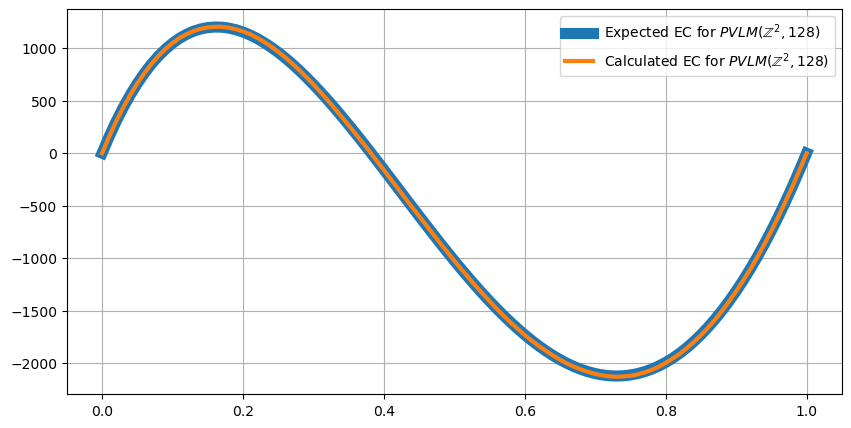

In [35]:
n, d = size, 2

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = [ec_cubical(n, d, p) for p in x]

plt.plot(x, y, linewidth=8, label='Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, mean_EC, linewidth=3, label='Calculated EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

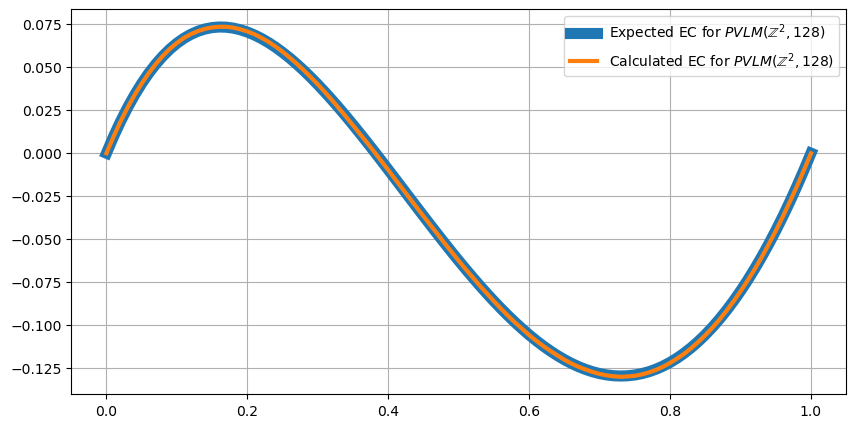

In [36]:
n, d = size, 2

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = np.array([ec_cubical(n, d, p) for p in x])
coeff = n**(-d)

plt.plot(x, y*coeff, linewidth=8, label='Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, mean_EC*coeff, linewidth=3, label='Calculated EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

## Dim 3

In [37]:
size = 69
experiments = 100
filename = 'lab-results/lab_cubical_tessellation_on_torus3d_aggregated/size{0}.csv'.format(size)
df = pd.read_csv(filename)
df.shape

(12085306, 4)

In [38]:
clock = time.perf_counter()
n = 100
array = np.arange(0, 1.01, 0.01)
mean_EC = calculate_mean_EC(df, array)
print('Calculated in {0: .4f} seconds.'.format(time.perf_counter() - clock))

Calculated in  22.2465 seconds.


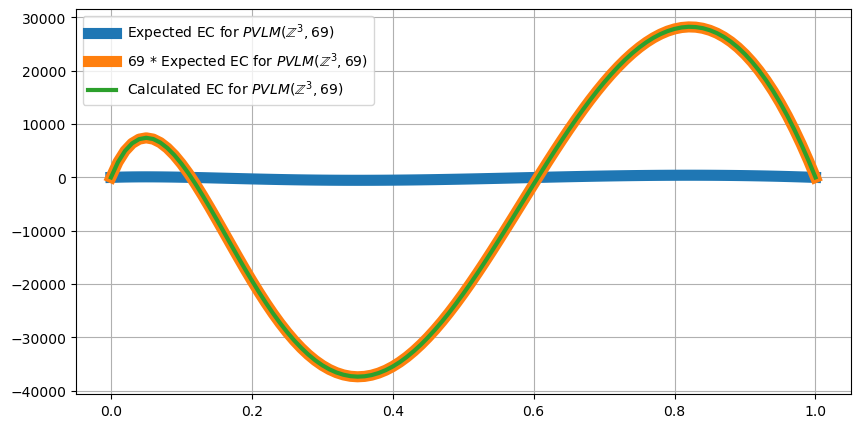

In [47]:
n, d = size, 3

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = np.array([ec_cubical(n, d, p) for p in x])

coeff = 69
coeff_s = str(coeff) + ' * '

plt.plot(x, y, linewidth=8, label='Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, y*coeff, linewidth=8, label=coeff_s + 'Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, mean_EC, linewidth=3, label='Calculated EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

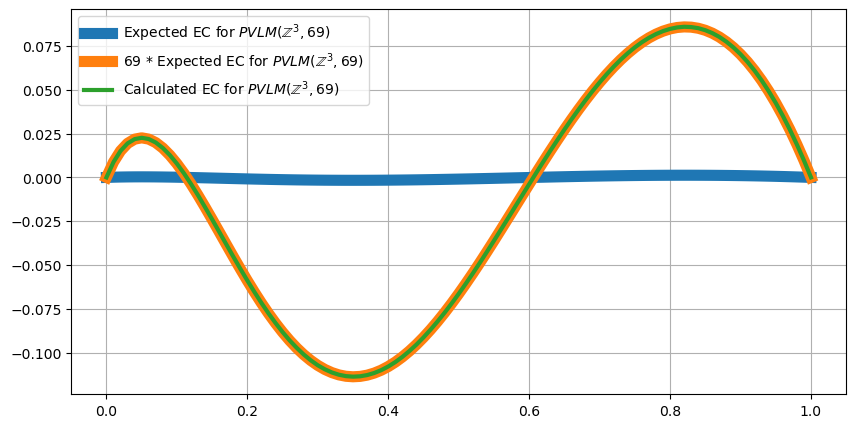

In [46]:
n, d = size, 3

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = np.array([ec_cubical(n, d, p) for p in x])

coeff = 69
coeff_s = str(coeff) + ' * '
c = size**(-d)

plt.plot(x, c*y, linewidth=8, label='Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, c*y*coeff, linewidth=8, label=coeff_s + 'Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))
plt.plot(x, c*mean_EC, linewidth=3, label='Calculated EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

In [41]:
assert False

AssertionError: 

## Dim 4

In [ ]:
n, d = 100, 4

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)

for d in range(2, 5):
    y = np.array([ec_cubical(n, d, p) for p in x])
    plt.plot(x, y, linewidth=4, label='Expected EC for $PVLM(\mathbb{Z}^D, N)$'.replace('D', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

# Permutahedral complex

__Omer Bobrowski & Primoz Skraba. Homological Percolation and the Euler Characteristic. Permutahedral complex. Page 10__

$$
    \mathbb{E}\{\chi(P(n, p))\} = n \sum\limits_{k=0}^d (-1)^{d-k} \left(1 - (1-p)^{k+1}\right) \sum\limits_{j=0}^{k+1} (-1)^{k+1-j} C_k^j j^{d+1}
$$

In [ ]:
def ec_permutahedral10(n, d, p):
    s = 0
    for k in range(d+1):
        s1 = 0
        for j in range(k+2):
            s1 += (-1)**(k+1-j) * sp.special.comb(k, j) * j**(d+1)
        s += (-1)**(d-k) * (1 - (1 - p)**(k+1)) * s1
    return s

__Omer Bobrowski & Primoz Skraba. Homological Percolation and the Euler Characteristic. Application A. Page 22__

$$
    F_k(P_n^d) = 
    \cfrac{n}{d+1-k} \sum\limits_{j=0}^{d+1-k} (-1)^{d+1-k-j} C_{d+1-k}^j d^{d+1} = 
    n\sum\limits_{j=0}^{d+1-k} (-1)^{d+1-k-j} C_{d-k}^j j^d
$$

$$
    \mathbb{E}(\chi_P(n, p)) = 
    n\sum\limits_{k=0}^d (-1)^k \left(1 - (1-p)^{d+1-k}\right) \sum\limits_{j=0}^{d+1-k} (-1)^{d+1-k-j} C_{d-k}^j j^{d+1}
$$

In [ ]:
def ec_permutahedral22(n, d, p):
    s = 0
    for k in range(d+1):
        s1 = 0
        for j in range(d+1-k):
            s1 += (-1)**(k+1-j) * sp.special.comb(k, j) * j**(d+1)
        s += (-1)**(d-k) * (1 - (1 - p)**(k+1)) * s1
    return s

In [ ]:
plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)

n, d = 100, 2
y22 = np.array([ec_permutahedral22(n, d, p) for p in x])
y10 = np.array([ec_permutahedral10(n, d, p) for p in x])

plt.plot(x, y10, linewidth=4, label='$\mathbb{E}(\chi_P(N, p))$, $d = dim$, page 10'.replace('dim', str(d)).replace('N', str(n)))
plt.plot(x, y22, linewidth=4, label='$\mathbb{E}(\chi_P(N, p))$, $d = dim$, page 22'.replace('dim', str(d)).replace('N', str(n)))

n, d = 100, 3
y22 = np.array([ec_permutahedral22(n, d, p) for p in x])
y10 = np.array([ec_permutahedral10(n, d, p) for p in x])

plt.plot(x, y10, linewidth=4, label='$\mathbb{E}(\chi_P(N, p))$, $d = dim$, page 10'.replace('dim', str(d)).replace('N', str(n)))
plt.plot(x, y22, linewidth=4, label='$\mathbb{E}(\chi_P(N, p))$, $d = dim$, page 22'.replace('dim', str(d)).replace('N', str(n)))


plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def ec_permutahedral(n, d, p):
    return ec_permutahedral22(n, d, p)

Something is wrong here

## Dim 2

In [ ]:
size = 128
experiments = 100
filename = 'lab-results/lab_hexagonal_tessellation_on_torus2d_modern_aggregated/size{0}.csv'.format(size)
df = pd.read_csv(filename)
df.shape

In [ ]:
clock = time.perf_counter()
array = np.arange(0, 1.01, 0.01)
mean_EC = calculate_mean_EC(df, array)
print('Calculated in {0: .4f} seconds.'.format(time.perf_counter() - clock))

In [ ]:
n, d = size, 2

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = np.array([ec_permutahedral(n, d, p) for p in x])

plt.plot(x, y, linewidth=8, label='Expected EC for $PVLM(A^*_dim, N)$'.replace('dim', str(d)).replace('N', str(n)))
plt.plot(x, mean_EC, linewidth=3, label='Calculated EC for $PVLM(A^*_dim, N)$'.replace('dim', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()

# Dim 3

In [ ]:
size = 31
experiments = 100
filename = 'lab-results/lab_voronoiBCC_tessellation_on_torus3d_aggregated/size{0}.csv'.format(size)
df = pd.read_csv(filename)
df.shape

In [ ]:
clock = time.perf_counter()
n = 100
array = np.arange(0, 1 + 1/n, 1/n)
mean_EC = calculate_mean_EC(df, array)
print('Calculated in {0: .4f} seconds.'.format(time.perf_counter() - clock))

In [ ]:
n, d = size, 3

plt.figure(figsize=(10, 5))

x = np.arange(0, 1.01, 0.01)
y = np.array([ec_permutahedral(n, d, p) for p in x])

plt.plot(x, y, linewidth=8, label='Expected EC for $PVLM(A^*_dim, N)$'.replace('dim', str(d)).replace('N', str(n)))
plt.plot(x, mean_EC, linewidth=3, label='Calculated EC for $PVLM(A^*_dim, N)$'.replace('dim', str(d)).replace('N', str(n)))

plt.grid(True)
plt.legend()
plt.show()